# Classification de photos de légumes

Todo:
- Mettre en place le principe d'augmentation des données
- Mettre en place le principe d'extraction des données d'un modèle dejà entrainé.

## Problèmatique

Le projet consiste à obtenir un modèle capable de classer une photo de légume.<br />

## Les données

Les données utilisées pour ce projet proviennent d'un dataset trouvé sur Kaggle.<br />
Source : https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset/data<br />
Le dataset a été téléchargé à la main au préalable, puis déposé dans le dossier resources.

## Modules

In [1]:
import nnz

w = nnz.Workspace()

2024-06-12 11:44:39.293099: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-12 11:44:39.990772: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# X_train, y_train, X_val, y_val, X_test, y_test = w.splitFolders("./resources/classes", "./resources", verbose=1, size_train=0.6, size_val=0.15, size_test=0.25, resize=(128,128))

In [3]:
w.get_classes()

name  train_count  val_count  test_count
0   Bitter_Gourd          840        210         350
1    Cauliflower          840        210         350
2         Papaya          840        210         350
3         Tomato          840        210         350
4        Brinjal          840        210         350
5         Carrot          840        210         350
6       Capsicum          840        210         350
7         Potato          840        210         350
8           Bean          840        210         350
9   Bottle_Gourd          840        210         350
10      Cucumber          840        210         350
11      Broccoli          840        210         350
12       Cabbage          840        210         350
13       Pumpkin          840        210         350
14        Radish          840        210         350

In [4]:
# Loader from dataset if exist
X_train, y_train, X_val, y_val, X_test, y_test = w.loadDatasetSplited(path_file='./resources/dataset.h5')
print("X_train : ", X_train.shape)
print("y_train : ", y_train.shape)
print("X_val : ", X_val.shape)
print("y_val : ", y_val.shape)
print("X_test : ", X_test.shape)
print("y_test : ", y_test.shape)

labels = w.get_classes()['name']
labels

X_train :  (12600, 128, 128, 3)
y_train :  (12600,)
X_val :  (3150, 128, 128, 3)
y_val :  (3150,)
X_test :  (5250, 128, 128, 3)
y_test :  (5250,)


0     Bitter_Gourd
1      Cauliflower
2           Papaya
3           Tomato
4          Brinjal
5           Carrot
6         Capsicum
7           Potato
8             Bean
9     Bottle_Gourd
10        Cucumber
11        Broccoli
12         Cabbage
13         Pumpkin
14          Radish
Name: name, dtype: object

## Normalisation des images

In [5]:
print('Avant normalisation X_train : Min={}, max={}'.format(X_train.min(),X_train.max()))
print('Avant normalisation X_val : Min={}, max={}'.format(X_val.min(),X_val.max()))
print('Avant normalisation X_test : Min={}, max={}'.format(X_test.min(),X_test.max()))

xmax_train = X_train.max()
xmax_val = X_val.max()
xmax_test = X_test.max()
X_train_normalized = X_train / xmax_train
X_val_normalized = X_val / xmax_val
X_test_normalized = X_test / xmax_test

print('Après normalisation X_train : Min={}, max={}'.format(X_train_normalized.min(),X_train_normalized.max()))
print('Après normalisation X_val : Min={}, max={}'.format(X_val_normalized.min(),X_val_normalized.max()))
print('Après normalisation X_test : Min={}, max={}'.format(X_test_normalized.min(),X_test_normalized.max()))

Avant normalisation X_train : Min=0, max=255
Avant normalisation X_val : Min=0, max=255
Avant normalisation X_test : Min=0, max=255
Après normalisation X_train : Min=0.0, max=1.0
Après normalisation X_val : Min=0.0, max=1.0
Après normalisation X_test : Min=0.0, max=1.0


## Visualisation des 10 premières images de chaque set

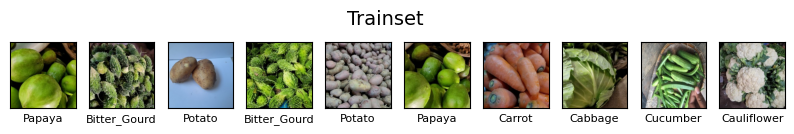

In [6]:
w.showImages(X_train_normalized, y=y_train, title="Trainset", classes=labels)

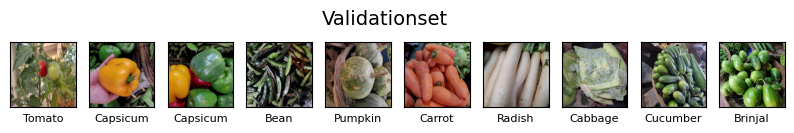

In [7]:
w.showImages(X_val_normalized, y=y_val, title="Validationset", classes=labels)

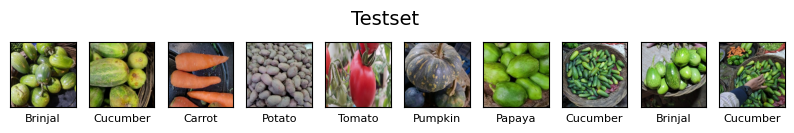

In [8]:
w.showImages(X_test_normalized, y=y_test, title="Testset", classes=labels)

## Création du modèle

In [20]:
num_classes = len(labels)

inputs = nnz.tensorflow.keras.layers.Input(shape=(128,128,3) )
x = nnz.tensorflow.keras.layers.Conv2D(32, (3,3),  activation='relu')(inputs)
x = nnz.tensorflow.keras.layers.MaxPooling2D((2,2))(x)
x = nnz.tensorflow.keras.layers.Dropout(0.2)(x)

x = nnz.tensorflow.keras.layers.Conv2D(64, (3,3),  activation='relu')(x)
x = nnz.tensorflow.keras.layers.MaxPooling2D((2,2))(x)
x = nnz.tensorflow.keras.layers.Dropout(0.2)(x)

x = nnz.tensorflow.keras.layers.Conv2D(128, (3,3),  activation='relu')(x)
x = nnz.tensorflow.keras.layers.MaxPooling2D((2,2))(x)
x = nnz.tensorflow.keras.layers.Dropout(0.2)(x)

x = nnz.tensorflow.keras.layers.Flatten()(x)
x = nnz.tensorflow.keras.layers.Dropout(0.5)(x)
x = nnz.tensorflow.keras.layers.Dense(512, activation='relu')(x)


output = nnz.tensorflow.keras.layers.Dense(num_classes, activation="softmax")(x)
model = nnz.tensorflow.keras.models.Model(inputs,output)
model.summary()

Model: "functional_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 15)             │         7,695 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,946,511 (49.39 MB)

 Trainable params: 12,946,511 (49.39 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
import gc
gc.collect()
nnz.torch.cuda.empty_cache()

name_model = 'test'

# history = w.fitModel(model, X_train_normalized, y_train, X_val_normalized, y_val, name=name_model, epochs=10, batch_size=32)
model = w.loadModel(name_model)

In [24]:
loaded_model = w.loadModel(name_model)
score = loaded_model.evaluate(X_test_normalized, y_test, verbose=1)


165/165 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.9736 - loss: 0.1028


In [25]:
import pandas as pd
log_data = pd.read_csv('./runtime/test.history.log', sep=',', engine='python')
log_data

epoch  accuracy      loss  val_accuracy  val_loss
0      0  0.541429  1.380482      0.625079  1.056976
1      1  0.808889  0.580242      0.896508  0.351909
2      2  0.901032  0.311147      0.901587  0.302912
3      3  0.932778  0.224827      0.942222  0.190068
4      4  0.945397  0.171922      0.943175  0.195366
5      5  0.954603  0.139501      0.970794  0.115890
6      6  0.967619  0.097958      0.959048  0.135997
7      7  0.970635  0.094042      0.965714  0.118397
8      8  0.972619  0.085523      0.971111  0.122286
9      9  0.977857  0.071813      0.966984  0.126437

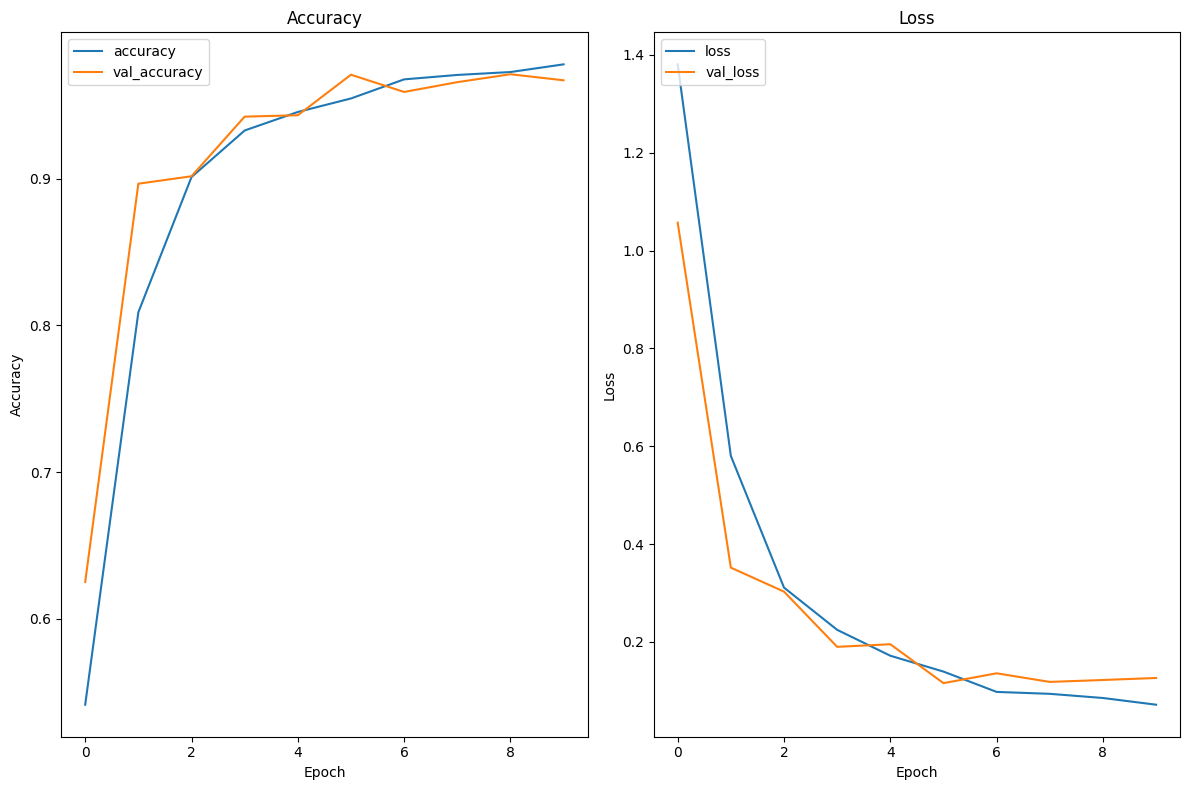

In [26]:
w.showMetrics(name=name_model)

In [27]:
import numpy as np
y_sigmoid = model.predict(X_test_normalized, verbose=1)
y_pred    = np.argmax(y_sigmoid, axis=-1)

165/165 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step


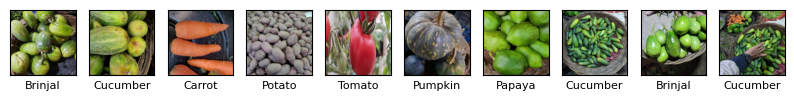

In [28]:
w.showImages(X_test_normalized, y=y_test, indices=range(0,100), y_pred=y_pred, classes=labels)

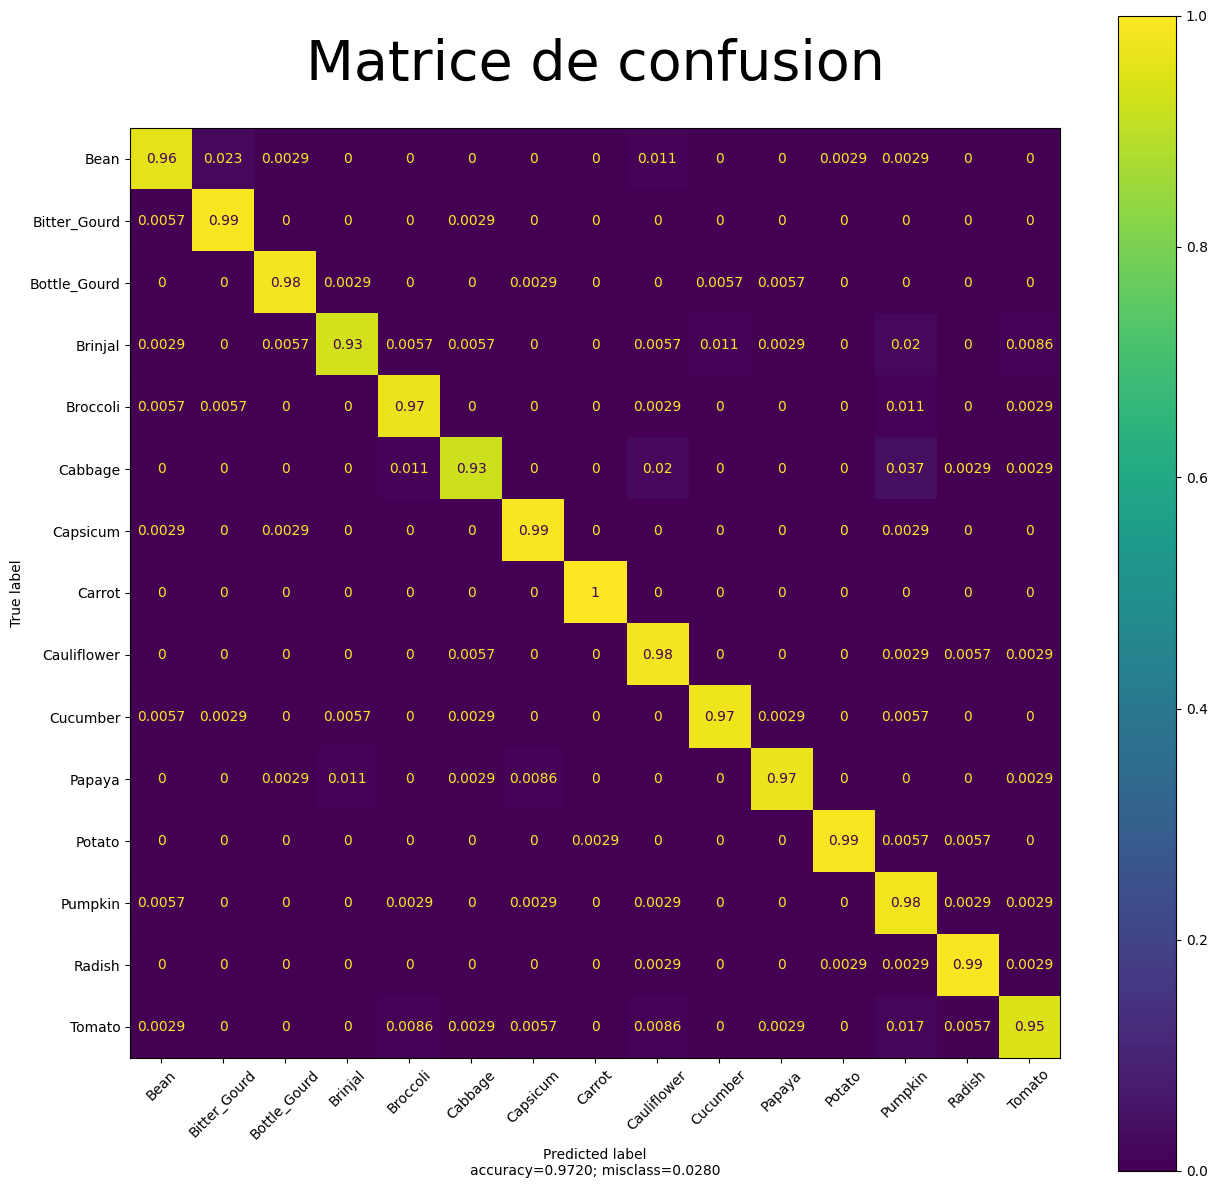

accuracy  precision    recall        f1
Bitter_Gourd     0.972   0.969274  0.991429  0.980226
Cauliflower      0.972   0.947658  0.982857  0.964937
Papaya           0.972   0.985507  0.971429  0.978417
Tomato           0.972   0.973529  0.945714  0.959420
Brinjal          0.972   0.978979  0.931429  0.954612
Carrot           0.972   0.997151  1.000000  0.998573
Capsicum         0.972   0.980226  0.991429  0.985795
Potato           0.972   0.994236  0.985714  0.989957
Bean             0.972   0.968208  0.957143  0.962644
Bottle_Gourd     0.972   0.985673  0.982857  0.984263
Cucumber         0.972   0.982709  0.974286  0.978479
Broccoli         0.972   0.971429  0.971429  0.971429
Cabbage          0.972   0.975904  0.925714  0.950147
Pumpkin          0.972   0.900262  0.980000  0.938440
Radish           0.972   0.977401  0.988571  0.982955

In [29]:
w.confusionMatrix(y_test, y_pred, labels)

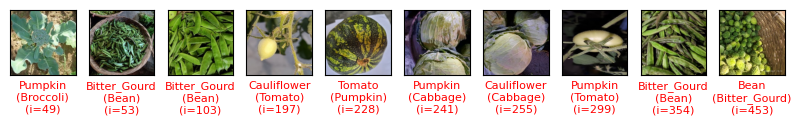

Nombre total d'erreur : 147 / 5250 ( 2.8000000000000003 % ) 


In [30]:
errors_indexes = w.showPredictionsErrors(X_test_normalized, y_test , y_pred, classes=labels)

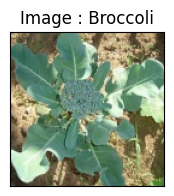

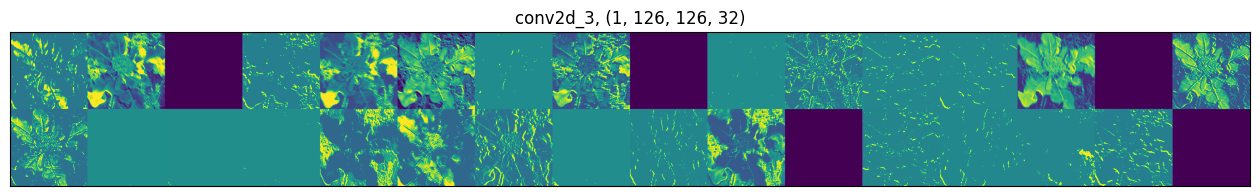

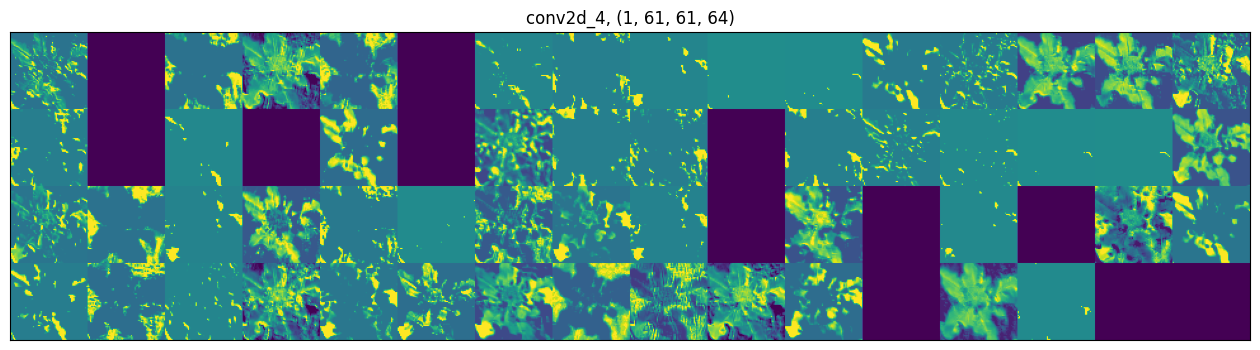

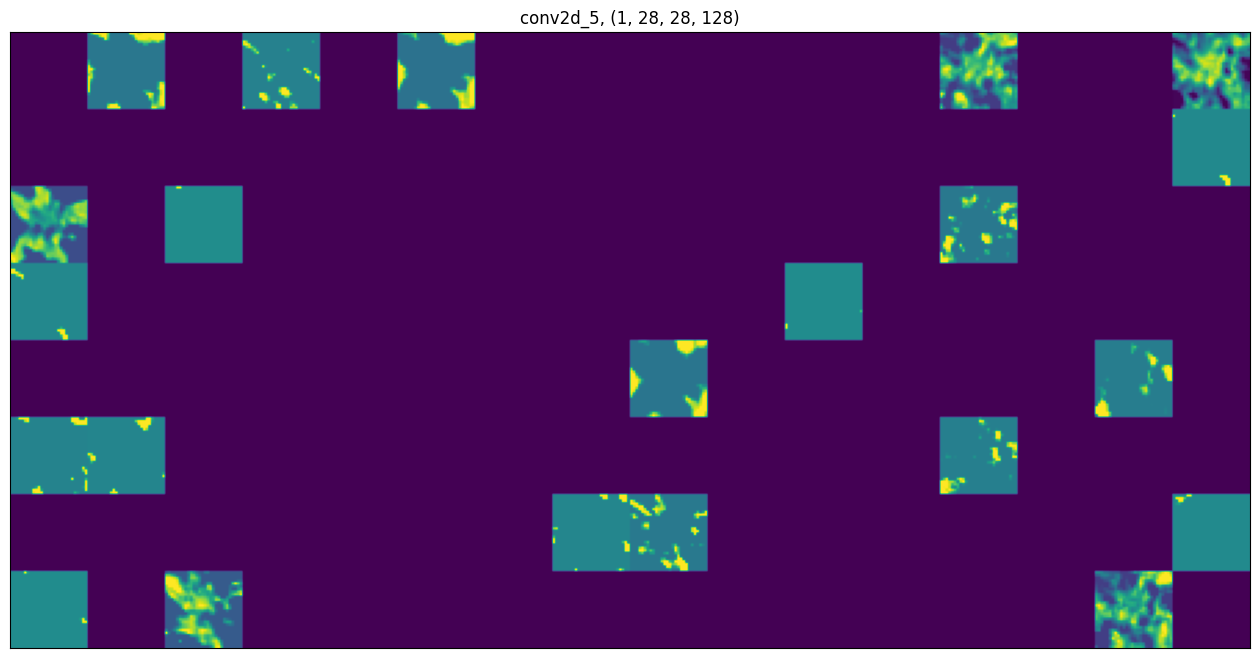

     classe     score
0   Pumpkin  0.694593
1  Broccoli  0.304761
2   Cabbage  0.000347
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


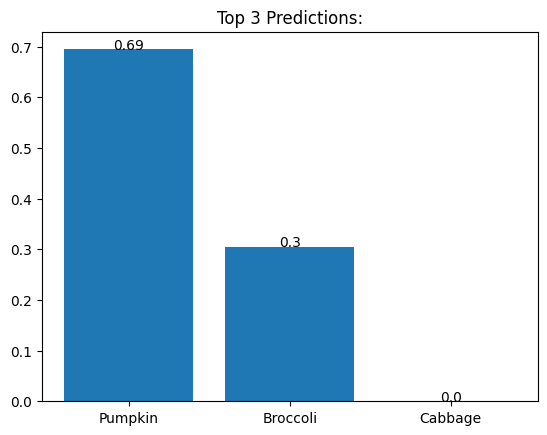

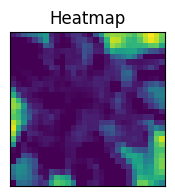

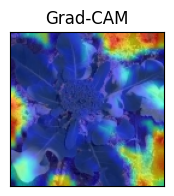

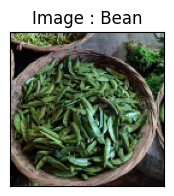

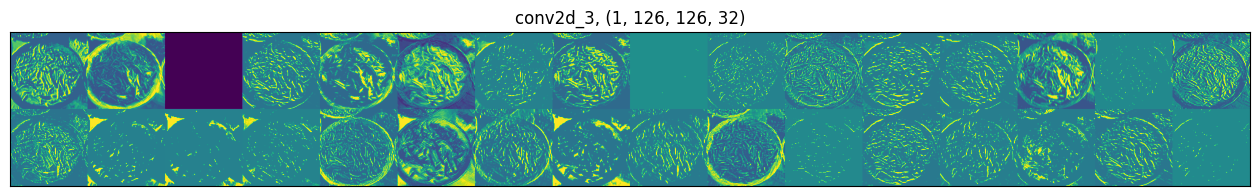

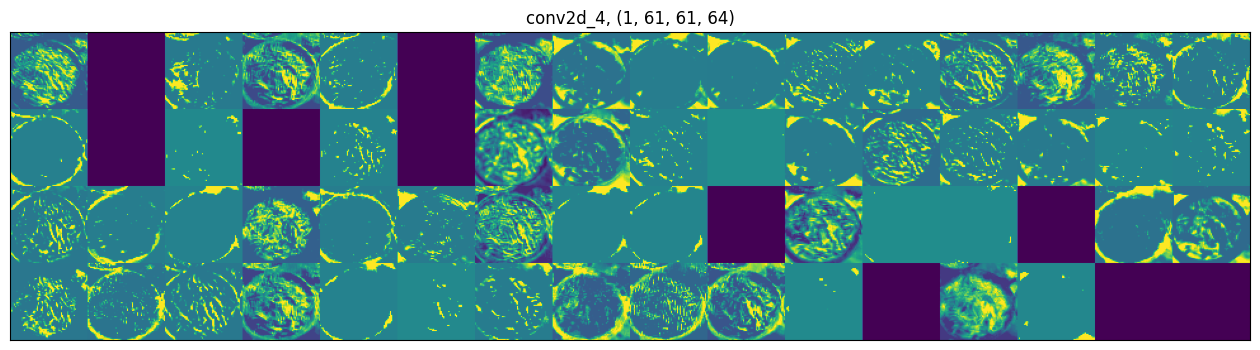

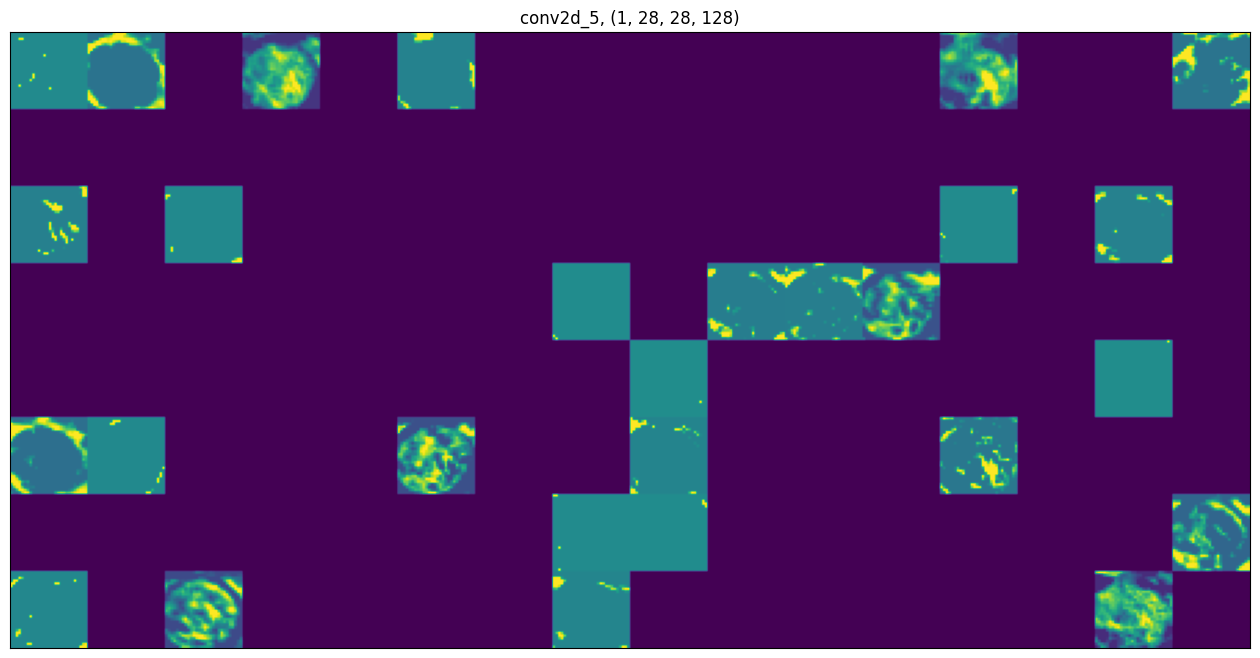

         classe     score
0  Bitter_Gourd  0.872276
1          Bean  0.127249
2   Cauliflower  0.000467
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


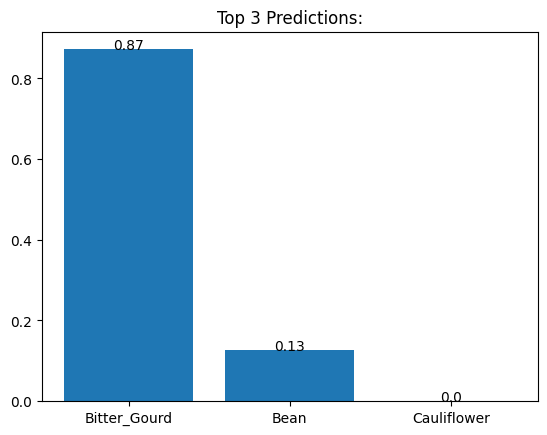

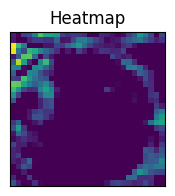

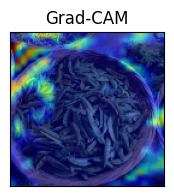

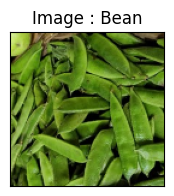

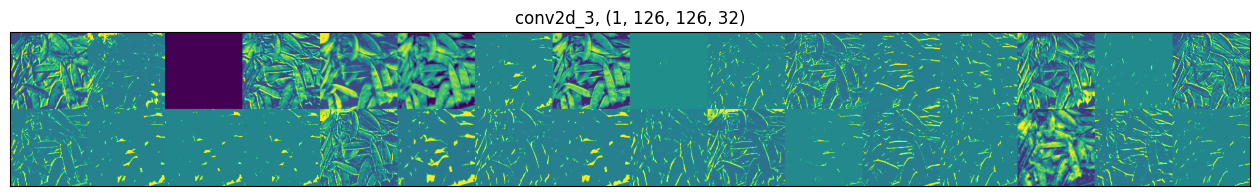

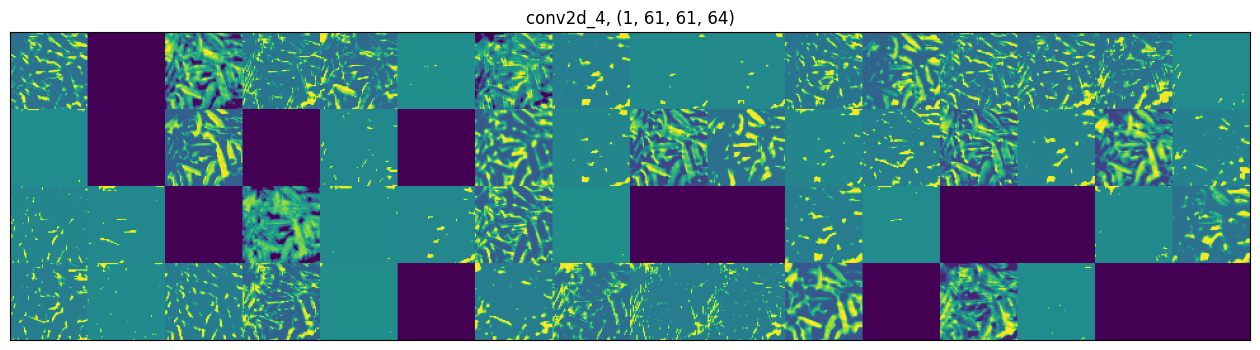

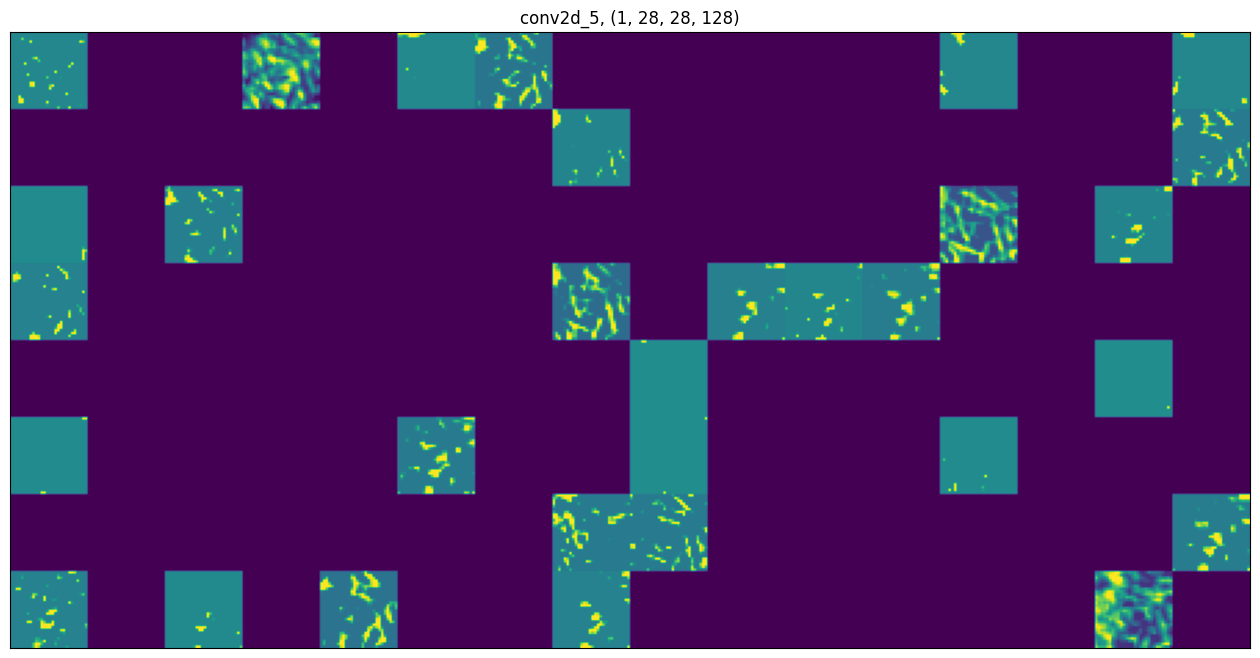

         classe     score
0  Bitter_Gourd  0.650404
1          Bean  0.349271
2      Cucumber  0.000313
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


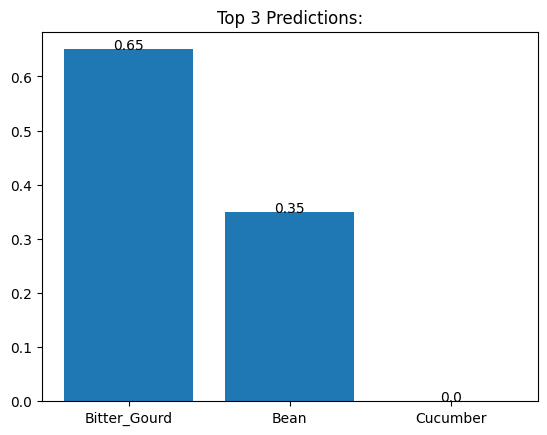

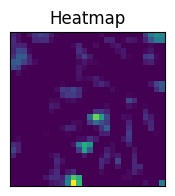

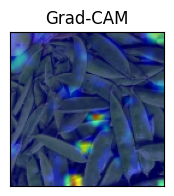

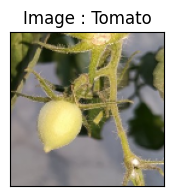

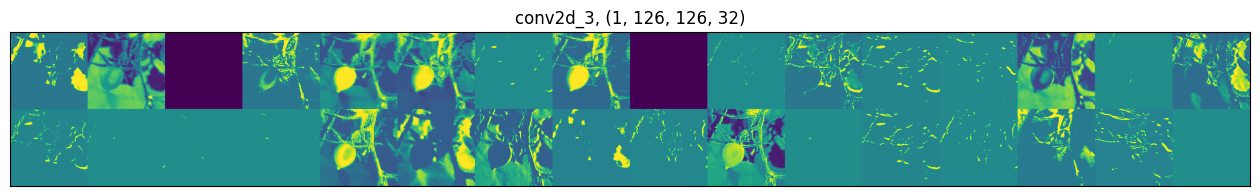

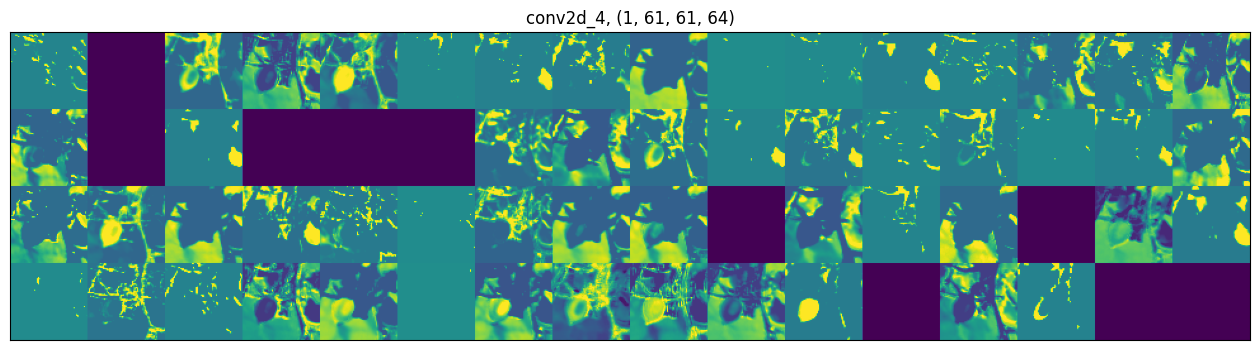

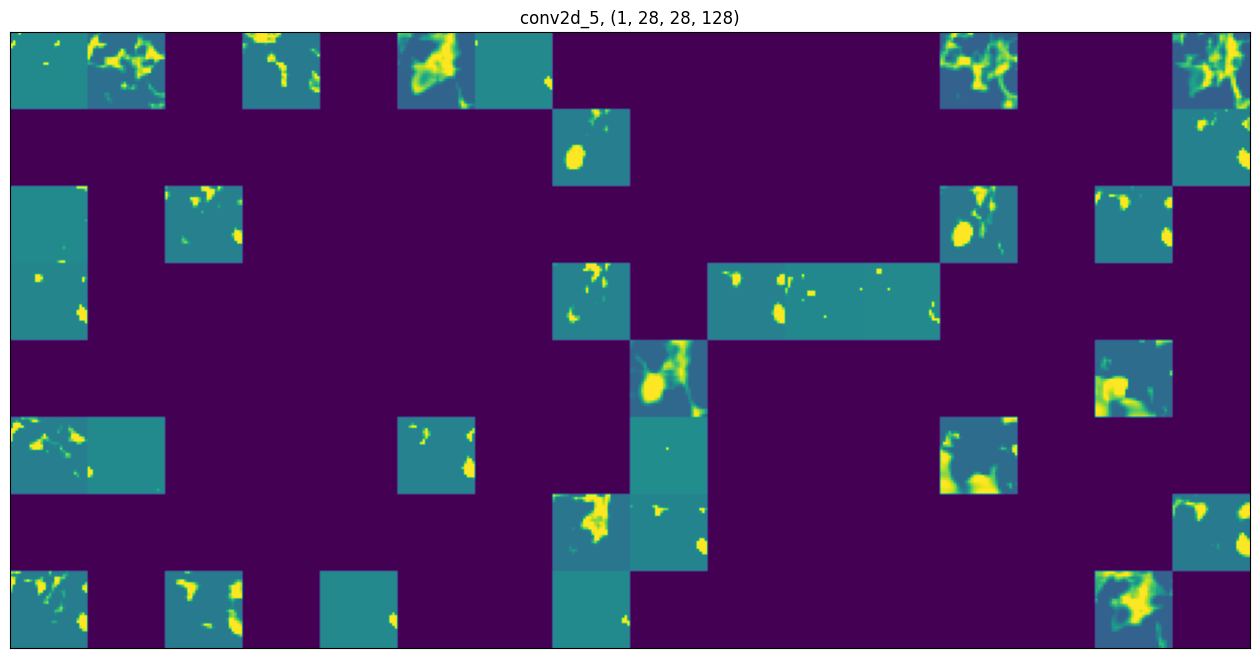

        classe     score
0  Cauliflower  0.641797
1      Pumpkin  0.131340
2       Tomato  0.103579
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


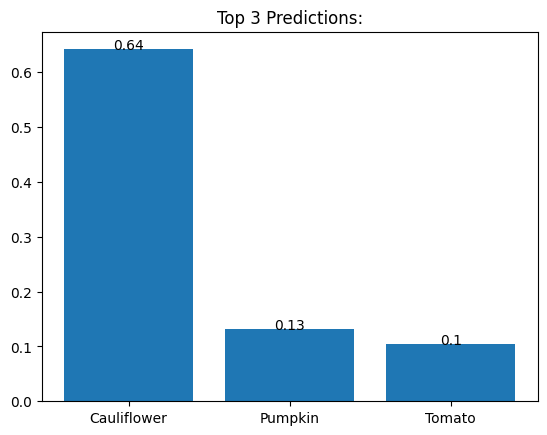

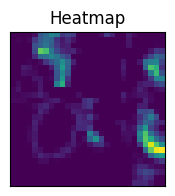

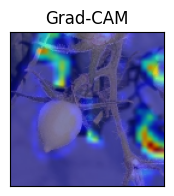

In [31]:
w.showInfosPredictions(model=model, X=X_test_normalized, y= y_test, labels=labels, indexes=errors_indexes, limit=3)